In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath("../"))

sys.path;

In [3]:
from help_function import *

In [4]:
train_df = pd.read_csv("../input/train.csv")

In [5]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
train_df.target.value_counts(dropna=False)

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
train_df.loc[train_df['target'] == 1, 'question_text'].tolist()[:10]

['Has the United States become the largest dictatorship in the world?',
 'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
 "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
 'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
 'Which races have the smallest penis?',
 'Why do females find penises ugly?',
 'How do I marry an American woman for a Green Card? How much do they charge?',
 "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
 'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
 "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?"]

In [ ]:
# Upsampling

train_upsampled = upsampling(train_df[train_df.target==0], 
                             train_df[train_df.target==1])
train_upsampled['target'].value_counts()

In [8]:
# Downsampling

train_downsampled = downsampling(train_df[train_df.target==0], 
                                 train_df[train_df.target==1])
train_downsampled['target'].value_counts()

1    80810
0    80810
Name: target, dtype: int64

In [9]:
from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def clean_raw_data(text):
    clean_text = nltk.word_tokenize(text)
    
    return ' '.join([token for token in clean_text 
                     if token not in stop_words and token not in punctuation])

In [10]:
import nltk

train_downsampled['tokenized'] = train_downsampled.apply(lambda x: clean_raw_data(x['question_text']), axis=1)

In [11]:
train_downsampled.head()

,qid,question_text,target,tokenized
824538,a1949c2d0f0f2b18c1da,How many songs did Prince have after his death?,0,How many songs Prince death
296257,3a0157c5f548756a3362,Where can I obtain edible seaweed that tastes ...,0,Where I obtain edible seaweed tastes like bacon
29904,05d88600609f7a40a7eb,What is full form of etc?,0,What full form etc
1136592,dec083b228b5b3c8cdfc,How is c-dac Noida for PG-BDA course?,0,How c-dac Noida PG-BDA course
207098,287fd4fa869108f499fa,What is scope of doing Part time M.tech From V...,0,What scope Part time M.tech From VJTI Mumbai


In [12]:
train_downsampled.to_csv("../input/downsampled_prepped.csv", index=False)

---

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier


pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb', SGDClassifier(loss='perceptron', max_iter=100, random_state=42)),
])

F1 score:  0.8355495053115202
Normalized confusion matrix


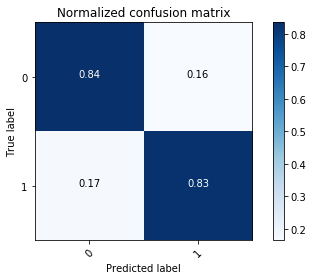

In [30]:
export_path = os.path.abspath("../models/sgdclassifier_downsampling.pickle")

basic_model = train_model(pipeline_sgd, train_downsampled)#, export_path=export_path)

## Using Linear SVClassifier
---

In [15]:
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lsvc', LinearSVC()),
])

In [19]:
%run ../help_function/functions.py

F1 score:  0.8815940858240924
Normalized confusion matrix


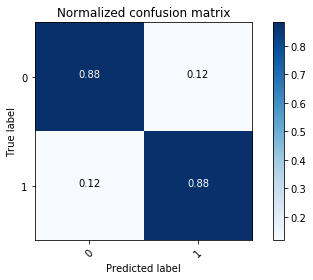

In [20]:
export_path = os.path.abspath("../models/linearSVC_downsampling.pickle")

model_svm = train_model(pipeline_svm, train_downsampled,
                        export_path=export_path)

## Using LogisticRegression
---

In [21]:
from sklearn.linear_model import LogisticRegression

pipeline_log_reg = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('log_reg', LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')),
])

F1 score:  0.8819017277294449
Normalized confusion matrix


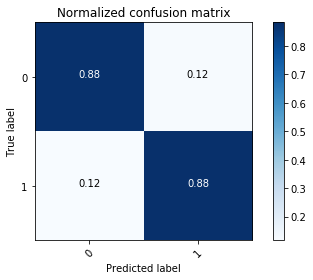

In [22]:
export_path = os.path.abspath("../models/logisticregression_downsampling.pickle")

model_log_reg = train_model(pipeline_log_reg, train_downsampled, export_path=export_path)

## Using DecisionTreeClassifier
---

In [26]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dtree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('dtree', DecisionTreeClassifier(max_depth=30)),
])

F1 score:  0.7586114317931645
Normalized confusion matrix


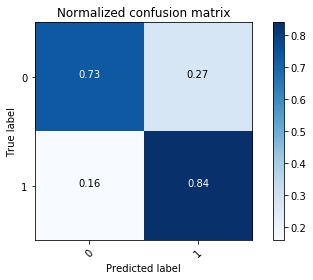

In [27]:
export_path = os.path.abspath("../models/decisiontree_downsampling.pickle")

model_tree = train_model(pipeline_dtree, train_downsampled, export_path=export_path)

---

In [31]:
train_downsampled['tokens'] = train_downsampled.apply(lambda x: x['tokenized'].split(' '), axis=1)

In [32]:
train_downsampled.head()

,qid,question_text,target,tokenized,tokens
824538,a1949c2d0f0f2b18c1da,How many songs did Prince have after his death?,0,How many songs Prince death,"[How, many, songs, Prince, death]"
296257,3a0157c5f548756a3362,Where can I obtain edible seaweed that tastes ...,0,Where I obtain edible seaweed tastes like bacon,"[Where, I, obtain, edible, seaweed, tastes, li..."
29904,05d88600609f7a40a7eb,What is full form of etc?,0,What full form etc,"[What, full, form, etc]"
1136592,dec083b228b5b3c8cdfc,How is c-dac Noida for PG-BDA course?,0,How c-dac Noida PG-BDA course,"[How, c-dac, Noida, PG-BDA, course]"
207098,287fd4fa869108f499fa,What is scope of doing Part time M.tech From V...,0,What scope Part time M.tech From VJTI Mumbai,"[What, scope, Part, time, M.tech, From, VJTI, ..."


In [34]:
from gensim.models import Word2Vec

In [35]:
w2v_model = Word2Vec(train_downsampled['tokens'].tolist(), size=100, window=5, min_count=5, workers=4)

In [37]:
w2v_model.train(train_downsampled['tokens'].tolist(), total_examples=train_downsampled.shape[0], epochs=10)

(12396429, 14957630)

In [38]:
w2v_model.build_vocab_from_freq

<bound method BaseWordEmbeddingsModel.build_vocab_from_freq of <gensim.models.word2vec.Word2Vec object at 0x2E3C8590>>

---

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter

class PosTagMatrix(BaseEstimator, TransformerMixin):
    #normalise = True - devide all values by a total number of tags in the sentence
    #tokenizer - take a custom tokenizer function
    def __init__(self, tokenizer=lambda x: x.split(), normalize=True):
        self.tokenizer=tokenizer
        self.normalize=normalize

    #helper function to tokenize and count parts of speech
    def pos_func(self, sentence):
        import nltk
        return Counter(tag for word,tag in nltk.pos_tag(self.tokenizer(sentence)))

    # fit() doesn't do anything, this is a transformer class
    def fit(self, X, y = None):
        return self

    #all the work is done here
    def transform(self, X):
        X_tagged = X.apply(self.pos_func).apply(pd.Series).fillna(0)
        X_tagged['n_tokens'] = X_tagged.apply(sum, axis=1)
        if self.normalize:
            X_tagged = X_tagged.divide(X_tagged['n_tokens'], axis=0)

        return X_tagged

In [32]:
import nltk

k = PosTagMatrix(nltk.word_tokenize)

k.transform(train_df['question_text'])

KeyboardInterrupt: 

In [40]:
k.transform(train_df.loc[0:1000, 'question_text'])

,WRB,VBD,NNP,NNS,VBP,PRP$,NN,IN,DT,CD,...,JJR,``,'',POS,$,RBS,PDT,FW,:,n_tokens
0,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.071429,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
1,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.055556,0.000000,0.055556,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
2,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.416667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
3,0.100000,0.200000,0.400000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
4,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.187500,0.062500,0.125000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
5,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
6,0.100000,0.000000,0.050000,0.100000,0.050000,0.000000,0.000000,0.050000,0.050000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
7,0.000000,0.000000,0.000000,0.125000,0.187500,0.062500,0.000000,0.062500,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
8,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.190476,0.047619,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
9,0.021277,0.063830,0.000000,0.063830,0.021277,0.042553,0.106383,0.042553,0.042553,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0


In [37]:
train_df.loc[0:10, 'question_text']

0     How did Quebec nationalists see their province...
1     Do you have an adopted dog, how would you enco...
2     Why does velocity affect time? Does velocity a...
3     How did Otto von Guericke used the Magdeburg h...
4     Can I convert montra helicon D to a mountain b...
5     Is Gaza slowly becoming Auschwitz, Dachau or T...
6     Why does Quora automatically ban conservative ...
7     Is it crazy if I wash or wipe my groceries off...
8     Is there such a thing as dressing moderately, ...
9     Is it just me or have you ever been in this ph...
10                     What can you say about feminism?
Name: question_text, dtype: object

In [98]:
train_downsampled = downsampling(train_df[train_df['target'] == 0], train_df[train_df['target'] == 1])

In [48]:
import spacy

In [49]:
nlp = spacy.load('en_core_web_sm')

In [89]:
def processing(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not (token.is_stop or token.is_punct)])

In [101]:
train_downsampled['filtered_df'] = train_downsampled.apply(lambda x: processing(x['question_text']), axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(train_downsampled['filtered_df'], 
                                                    train_downsampled['target'], random_state = 0)

model_clean = pipeline_sgd.fit(X_train, y_train)
y_predict = model_clean.predict(X_test)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [103]:
f1_score(y_test, y_predict)

0.8720462790469653

# Spacy
---

In [ ]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [70]:
doc = nlp('Has the United States become the largest dictatorship in the world?')

In [74]:
[token for token in doc if not (token.is_punct or token.is_stop)]

[Has, United, States, largest, dictatorship, world]

In [75]:
doc

Has the United States become the largest dictatorship in the world?

In [77]:
long_doc = nlp('I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?')

In [79]:
list(long_doc.sents)

[I am gay boy and I love my cousin (boy).,
 He is sexy, but I dont know what to do.,
 He is hot, and I want to see his di**. What should I do?]

In [85]:
[token for token in long_doc if not (token.is_punct or token.is_stop)]

[I,
 gay,
 boy,
 I,
 love,
 cousin,
 boy,
 He,
 sexy,
 I,
 nt,
 know,
 He,
 hot,
 I,
 want,
 di**.,
 What,
 I]

In [ ]:
spacy, pandas, numpy, seaborn, matplotlib, sklearn

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 3 columns):
qid              375806 non-null object
question_text    375806 non-null object
prediction       375806 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.7+ MB


# word2vec

In [106]:
train_downsampled.shape

(161620, 4)

In [108]:
nlp = spacy.load('en', parser=False, entity=False)

In [109]:
train_downsampled['tokenizer'] = train_downsampled.apply(lambda x: nlp.tokenizer(x['question_text']), axis=1)ii

KeyboardInterrupt: 

In [114]:
import nltk
train_downsampled['tokenizer_nltk'] = train_downsampled.apply(lambda x: nltk.word_tokenize(x['question_text']), axis=1)

KeyboardInterrupt: 

In [115]:
train_downsampled.head()

,qid,question_text,target,filtered_df,tokenizer_nltk
824538,a1949c2d0f0f2b18c1da,How many songs did Prince have after his death?,0,How songs Prince death,"[How, many, songs, did, Prince, have, after, h..."
296257,3a0157c5f548756a3362,Where can I obtain edible seaweed that tastes ...,0,Where I obtain edible seaweed tastes like bacon,"[Where, can, I, obtain, edible, seaweed, that,..."
29904,05d88600609f7a40a7eb,What is full form of etc?,0,What form etc,"[What, is, full, form, of, etc, ?]"
1136592,dec083b228b5b3c8cdfc,How is c-dac Noida for PG-BDA course?,0,How c dac Noida PG BDA course,"[How, is, c-dac, Noida, for, PG-BDA, course, ?]"
207098,287fd4fa869108f499fa,What is scope of doing Part time M.tech From V...,0,What scope Part time M.tech From VJTI Mumbai,"[What, is, scope, of, doing, Part, time, M.tec..."


In [117]:
corp = train_downsampled['tokenizer_nltk'].values.tolist()

MemoryError: 

In [121]:
train_downsampled.drop('tokenizer_nltk', axis=1, inplace=True)

MemoryError: 

In [123]:
train_downsampled[['qid', 'question_text', 'target']]

MemoryError: 

In [ ]:
pandas, numpy, matplotlib, gensim, nltk, sklearn, 